In [1]:
# Date Time Indexing
import pandas as pd
# Load data from a CSV file
df = pd.read_csv('/Users/aplle/Desktop/Applied Data Science/Tme Series Data/AirPassengers (1).csv')

In [2]:
df = df.dropna(inplace=False)
# Convert date column to datetime format
df['Month'] = pd.to_datetime(df['Month'])
# Set date column as index
df.set_index('Month', inplace=True)

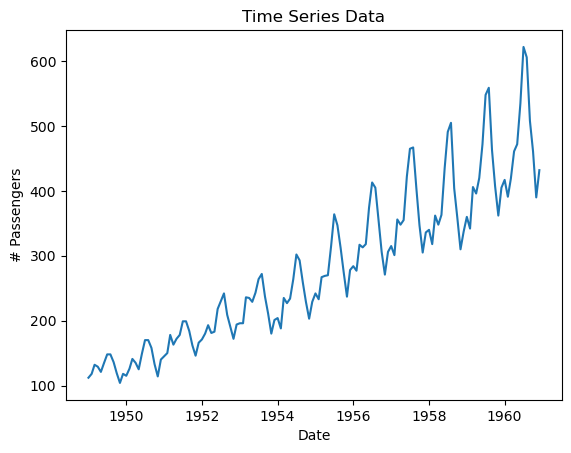

In [3]:
import matplotlib.pyplot as plt
# Create a line chart
plt.plot(df.index, df)
# Add labels and title
plt.xlabel('Date')
plt.ylabel('# Passengers')
plt.title('Time Series Data')
# Display the chart
plt.show()

In [4]:
# Splitting the dataset into train and test data
train=df[:120]
test=df[120:] 

In [5]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1958-08-01,505
1958-09-01,404
1958-10-01,359


In [6]:
test

,#Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


In [7]:
# Build Simple Exponential Model
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
smodel = SimpleExpSmoothing(train["#Passengers"]).fit()
test_pred_s = smodel.forecast(24)

/Users/aplle/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [8]:
# Build Holt's Model
hmodel=Holt(train["#Passengers"]).fit()
test_pred_h = hmodel.forecast(24)

/Users/aplle/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [9]:
# Build Holt Winter's Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwmodel = ExponentialSmoothing(train["#Passengers"],trend='add', seasonal='mul', seasonal_periods=12).fit()
test_pred_hw = hwmodel.forecast(24)

/Users/aplle/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [10]:
test

,#Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


In [11]:
test_pred_hw

1959-01-01    350.959395
1959-02-01    333.629324
1959-03-01    387.807141
1959-04-01    380.139165
1959-05-01    398.088738
1959-06-01    475.827941
1959-07-01    530.929437
1959-08-01    534.389339
1959-09-01    432.384028
1959-10-01    381.846818
1959-11-01    330.353490
1959-12-01    368.715038
1960-01-01    377.317009
1960-02-01    358.529584
1960-03-01    416.572032
1960-04-01    408.162086
1960-05-01    427.255680
1960-06-01    510.479069
1960-07-01    569.359992
1960-08-01    572.838411
1960-09-01    463.308447
1960-10-01    408.994974
1960-11-01    353.702291
1960-12-01    394.622574
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

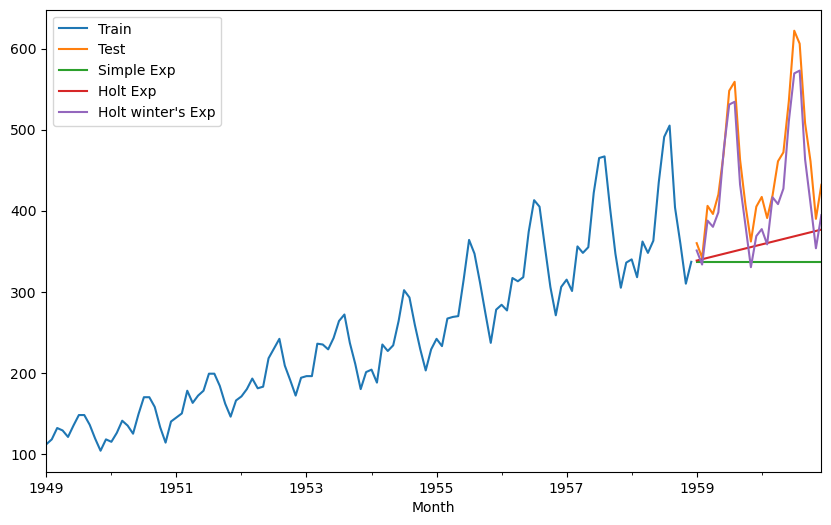

In [12]:
# Plot the results
train['#Passengers'].plot(legend=True, label='Train', figsize=(10,6))
test['#Passengers'].plot(legend=True, label='Test')

test_pred_s.plot(legend=True, label='Simple Exp')
test_pred_h.plot(legend=True, label='Holt Exp')
test_pred_hw.plot(legend=True, label='Holt winter\'s Exp')

In [13]:
# Calculate the MSE for the built models
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test,test_pred_hw))

32.48818087105796

In [14]:
np.sqrt(mean_squared_error(test,test_pred_s))

137.32898489662472

In [15]:
np.sqrt(mean_squared_error(test,test_pred_h))

118.31685230398281

In [16]:
df['#Passengers'].mean(), np.sqrt(df['#Passengers'].var())

(280.2986111111111, 119.96631694294321)

In [17]:
# Perform predictions with the best model
final_model=ExponentialSmoothing(df["#Passengers"],trend='add', seasonal='mul', seasonal_periods=12).fit()
pred=final_model.forecast(60)

/Users/aplle/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

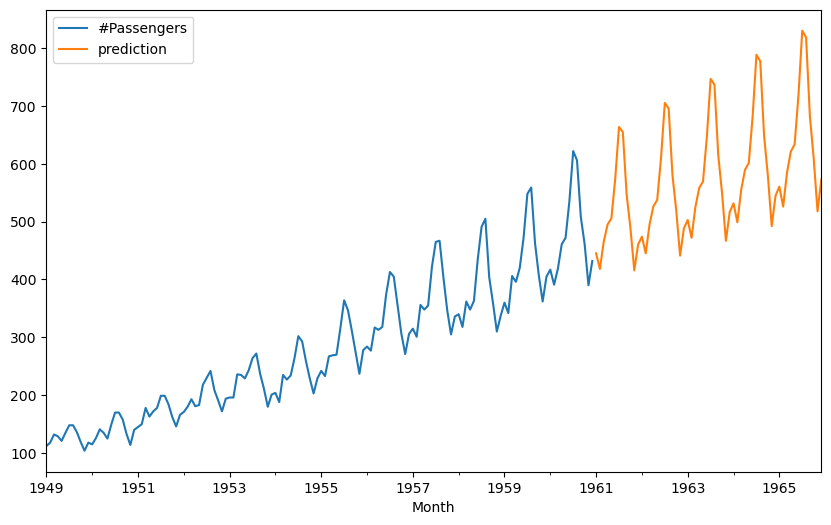

In [18]:
# Plot the predictions
df['#Passengers'].plot(legend=True, label='#Passengers', figsize=(10,6))
pred.plot(legend=True, label='prediction')